<a href="https://colab.research.google.com/github/anujsaxena/Python/blob/main/Boosting_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CatBoost Implementation**

In [1]:
import pandas as pd
data = pd.read_csv('winemag.csv')
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [2]:
print(data.shape)

(97946, 14)


In [3]:
print(data.info)

<bound method DataFrame.info of        Unnamed: 0    country  ...         variety               winery
0               0      Italy  ...     White Blend              Nicosia
1               1   Portugal  ...  Portuguese Red  Quinta dos Avidagos
2               2         US  ...      Pinot Gris            Rainstorm
3               3         US  ...        Riesling           St. Julian
4               4         US  ...      Pinot Noir         Sweet Cheeks
...           ...        ...  ...             ...                  ...
97941       97941      Spain  ...         Verdejo         Martinsancho
97942       97942     Israel  ...  Cabernet Franc             Recanati
97943       97943  Australia  ...      Chardonnay         Evans & Tate
97944       97944    Germany  ...        Riesling        Paul Anheuser
97945       97945        Isr  ...             NaN                  NaN

[97946 rows x 14 columns]>


In [4]:
data[data.duplicated(subset=['title','description'])].shape[0]

5695

In [5]:
data.drop_duplicates(subset=['title','description'],inplace=True)
data.shape[0]

92251

In [6]:
print(data.head())

   Unnamed: 0   country  ...         variety               winery
0           0     Italy  ...     White Blend              Nicosia
1           1  Portugal  ...  Portuguese Red  Quinta dos Avidagos
2           2        US  ...      Pinot Gris            Rainstorm
3           3        US  ...        Riesling           St. Julian
4           4        US  ...      Pinot Noir         Sweet Cheeks

[5 rows x 14 columns]


In [7]:
data.drop(columns=['description'],inplace=True)

In [8]:
print(data.head())

   Unnamed: 0   country  ...         variety               winery
0           0     Italy  ...     White Blend              Nicosia
1           1  Portugal  ...  Portuguese Red  Quinta dos Avidagos
2           2        US  ...      Pinot Gris            Rainstorm
3           3        US  ...        Riesling           St. Julian
4           4        US  ...      Pinot Noir         Sweet Cheeks

[5 rows x 13 columns]


In [9]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
print(data.head())

    country  ...               winery
0     Italy  ...              Nicosia
1  Portugal  ...  Quinta dos Avidagos
2        US  ...            Rainstorm
3        US  ...           St. Julian
4        US  ...         Sweet Cheeks

[5 rows x 12 columns]


In [11]:
# Getting the insight of null values present in the feature columns
data.isnull().sum()

country                     45
designation              26603
points                       1
price                     6466
province                    46
region_1                 15079
region_2                 56593
taster_name              19167
taster_twitter_handle    22609
title                        1
variety                      2
winery                       1
dtype: int64

In [12]:
wine_price = data.groupby('variety')['price'].describe()


In [13]:
print(wine_price)

              count       mean        std   min    25%   50%    75%    max
variety                                                                   
Abouriou        1.0  75.000000        NaN  75.0  75.00  75.0  75.00   75.0
Agiorgitiko    48.0  23.562500  12.938325  10.0  14.75  19.5  26.00   66.0
Aglianico     205.0  39.990244  24.646916   6.0  24.00  34.0  50.00  180.0
Aidani          1.0  27.000000        NaN  27.0  27.00  27.0  27.00   27.0
Airen           2.0   8.500000   0.707107   8.0   8.25   8.5   8.75    9.0
...             ...        ...        ...   ...    ...   ...    ...    ...
Zinfandel    1925.0  29.372468  12.406740   5.0  20.00  28.0  36.00  100.0
Zlahtina        1.0  13.000000        NaN  13.0  13.00  13.0  13.00   13.0
Zweigelt      121.0  21.487603  10.541281   9.0  14.00  18.0  25.00   65.0
Çalkarası       2.0  19.000000   0.000000  19.0  19.00  19.0  19.00   19.0
Žilavka         1.0  15.000000        NaN  15.0  15.00  15.0  15.00   15.0

[661 rows x 8 columns]


In [15]:
print(wine_price['mean'])

variety
Abouriou       75.000000
Agiorgitiko    23.562500
Aglianico      39.990244
Aidani         27.000000
Airen           8.500000
                 ...    
Zinfandel      29.372468
Zlahtina       13.000000
Zweigelt       21.487603
Çalkarası      19.000000
Žilavka        15.000000
Name: mean, Length: 661, dtype: float64


In [43]:
x=data['price']
print(wine_price['mean'])
var=x[0]
print(round(wine_price['mean'],2))
#round(wine_price['mean'].loc[var],2)

variety
Abouriou       75.000000
Agiorgitiko    23.562500
Aglianico      39.990244
Aidani         27.000000
Airen           8.500000
                 ...    
Zinfandel      29.372468
Zlahtina       13.000000
Zweigelt       21.487603
Çalkarası      19.000000
Žilavka        15.000000
Name: mean, Length: 661, dtype: float64
variety
Abouriou       75.00
Agiorgitiko    23.56
Aglianico      39.99
Aidani         27.00
Airen           8.50
               ...  
Zinfandel      29.37
Zlahtina       13.00
Zweigelt       21.49
Çalkarası      19.00
Žilavka        15.00
Name: mean, Length: 661, dtype: float64


In [44]:
#filling null values in price column with the median price value for each variety
def fill_pricenull(x):
    var=x[0]
    price=x[1]
    if pd.isnull(price):
        #return round(wine_price['mean'].loc[var],2)
        return round(wine_price['mean'],2)
    else:
        return round(price,2)

data['price']=data[['variety','price']].apply(fill_pricenull,axis=1)
data.head()

,country,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,Vulkà Bianco,87.0,75.0,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [45]:
data.isnull().sum()

country                     45
designation              26603
points                       1
price                        0
province                    46
region_1                 15079
region_2                 56593
taster_name              19167
taster_twitter_handle    22609
title                        1
variety                      2
winery                       1
dtype: int64

In [46]:
data = data[data['price'].notna()]

In [47]:
data.isnull().sum()


country                     45
designation              26603
points                       1
price                        0
province                    46
region_1                 15079
region_2                 56593
taster_name              19167
taster_twitter_handle    22609
title                        1
variety                      2
winery                       1
dtype: int64

In [60]:
data = data[data['variety'].notna()]

In [61]:
data.isnull().sum()


country                     45
designation              26601
points                       0
price                        0
province                    45
region_1                 15077
region_2                 56591
taster_name              19165
taster_twitter_handle    22607
title                        0
variety                      0
winery                       0
dtype: int64

In [62]:
import numpy as np
from sklearn.model_selection import train_test_split
X=data.drop(columns=['points'])
X=X.fillna(0)
y=data['points']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20122021)


In [50]:
print(X_test)

         country  ...                   winery
70939  Argentina  ...             Hubert Weber
59273      Chile  ...                Santa Ema
22104      Italy  ...            Paolo Scavino
83261         US  ...        Malibu Rocky Oaks
76933     France  ...  Château Haut Bertinerie
...          ...  ...                      ...
78328         US  ...                  Stanton
38311      Italy  ...            Poggio Stenti
82808         US  ...    Reid Family Vineyards
23270      Italy  ...            Wine for Food
4774       Spain  ...              Emilio Moro

[18451 rows x 11 columns]


In [51]:
print(X_train)

        country  ...                   winery
44339        US  ...              David Bruce
45491        US  ...                   2Plank
7748         US  ...               Iron Horse
20475     Chile  ...            Sierra Batuco
47657  Portugal  ...  Dona Maria-Júlio Bastos
...         ...  ...                      ...
67085        US  ...               Calcareous
73006        US  ...                 Girasole
59270    France  ...          Domaine Pommier
71661     Italy  ...          Poggio di Sotto
44347        US  ...                  Langtry

[73800 rows x 11 columns]


In [52]:
print(y_test)

70939    89.0
59273    84.0
22104    91.0
83261    88.0
76933    91.0
         ... 
78328    86.0
38311    90.0
82808    91.0
23270    85.0
4774     90.0
Name: points, Length: 18451, dtype: float64


In [53]:
print(y_train)

44339    91.0
45491    88.0
7748     91.0
20475    85.0
47657    92.0
         ... 
67085    87.0
73006    89.0
59270    84.0
71661    93.0
44347    93.0
Name: points, Length: 73800, dtype: float64


In [54]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.1 MB/s 


In [63]:
# Split data set into train' and 'test'
import numpy as np
from sklearn.model_selection import train_test_split

# we will drop out the target variable 'points' from our input data features
X=data.drop(columns=['points'])

#Filling the null values since CatBoost can't handle missing null values
X=X.fillna(0)

#To be used during Catboost's Feature Importance extractor
categorical_features_indices =np.where(X.dtypes == np.object)[0]

y=data['points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28102021)

In [64]:
categorical_features_indices

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10])

In [65]:
from catboost import Pool, CatBoostRegressor, cv

model = CatBoostRegressor(random_seed = 350,loss_function = 'RMSE',iterations=350)
#fitting the train data
model.fit(X_train, y_train,cat_features = categorical_features_indices,verbose=False)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

In [67]:
pred=model.predict(X_test)
print(pred)

[88.10114108 92.03686643 88.25200567 ... 87.90532332 85.86679074
 87.68995598]


Text(0, 0.5, 'predcitions')

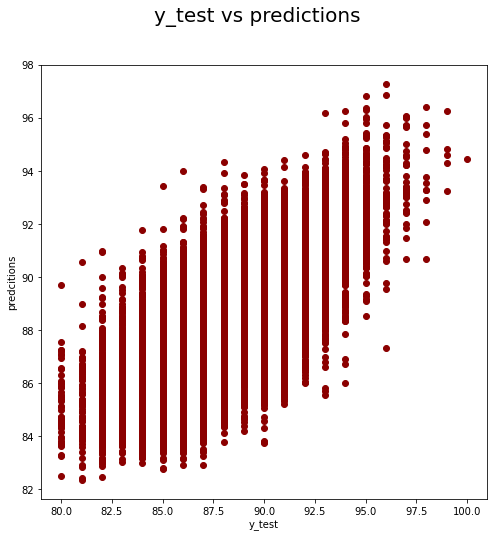

In [68]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))

plt.scatter(y_test,pred,color='darkred')
# Plot-label
fig.suptitle('y_test vs predictions',fontsize = 20)

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')

Text(0.5, 0.98, 'Residual Analysis')

<Figure size 576x576 with 0 Axes>

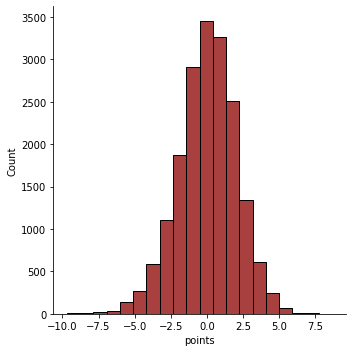

In [69]:
import seaborn as sns
fig=plt.figure(figsize=(8,8))
  
sns.displot((y_test-pred),bins=20,color='darkred')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20) 

In [70]:
from sklearn import metrics
print('Mean Absolute Error     MAE:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error      MSE:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error     MAE: 1.5848844665863207
Mean Squared Error      MSE: 4.070582461042596
Root Mean Squared Error RMSE: 2.017568452628707


In [72]:
errors = abs(pred - y_test)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print(accuracy)

98.20342590370274
